In [154]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## doc file writer
from docx import Document
from docx.shared import Inches

## nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import RegexpStemmer
from nltk.corpus import wordnet as wn

In [155]:
document = Document()

## DATA IMPORTS

In [156]:
tracks = pd.read_csv('./data/tracks.csv')
artists = pd.read_csv('./data/artists.csv')

In [157]:
# keep first element of id_artists
tracks['id_artists'] = tracks['id_artists'].str[2:-2]

In [158]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [159]:
## keep in artists only the artists that are in tracks, check by id in artists and id_artists in tracks
artists = artists[artists['id'].isin(tracks['id_artists'])]
artists.head()


,id,followers,genres,name,popularity
137,7DLDYPMRJ0NFPcBTlg04DE,187.0,[],Guru Dutt,2
138,1OCPhFtvkZDLUJJkrJfD2G,155.0,[],The De Castro Sisters,8
155,72578usTM6Cj5qWsi471Nc,248568.0,"['filmi', 'indian folk', 'indian rock', 'kanna...",Raghu Dixit,52
158,7b6Ui7JVaBDEfZB9k6nHL0,701766.0,"['desi pop', 'hindi indie', 'indian indie', 'i...",The Local Train,57
163,4bvGDTEPFnllKiJaEZGuXk,6395.0,['indian folk'],Achint,49


In [160]:
## merge tracks and artists
df = pd.merge(tracks, artists, left_on='id_artists', right_on='id', how='left')
df.head()

,id_x,name_x,popularity_x,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,id_y,followers,genres,name_y,popularity_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,...,0.7440,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,...,0.0000,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,...,0.0218,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,...,0.9180,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,...,0.1300,0.311,0.196,103.220,4,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35.0


In [161]:
df.keys()


Index(['id_x', 'name_x', 'popularity_x', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'id_y', 'followers',
       'genres', 'name_y', 'popularity_y'],
      dtype='object')

In [162]:
## rename popularity_x to popularity, drop popularity_y
df = df.rename(columns={'popularity_x': 'popularity'})
df = df.drop(['popularity_y'], axis=1)

## drop id_y
df = df.drop(['id_y'], axis=1)  # id_y is the id of artists 

## rename id_x to id
df = df.rename(columns={'id_x': 'id'})  # id_x is the id of tracks

## rename name_x to name
df = df.rename(columns={'name_x': 'name'})  # name_x is the name of tracks  

## rename name_y to artist_name
df = df.rename(columns={'name_y': 'artist_name'})  # name_y is the name of artists  

## rename followers to artist_followers     
df = df.rename(columns={'followers': 'artist_followers'})  # followers is the followers of artists  

## drop explicit,key,mode,release_date,year
df = df.drop(['explicit','key','mode','release_date'], axis=1)

## drop id_artists  
df = df.drop(['id_artists'], axis=1)

# drop artists , rename artist_name to artists
df = df.drop(['artists'], axis=1)
df = df.rename(columns={'artist_name': 'artists'})

# drop time_signature
df = df.drop(['time_signature'], axis=1)
# drop id
df = df.drop(['id'], axis=1)

# remove all rows where genres is '[]'
df = df[df['genres'] != '[]']

# in genres keep 2 to -2
df['genres'] = df['genres'].str[2:-2]
# split all genres by ',', take the first genre
df['genres'] = df['genres'].str.split(',').str[0]
# remove all no alpha characters in genres
df['genres'] = df['genres'].str.replace('[^a-zA-Z]', '')

## write all the steps to docx file
document.add_heading('Data Preprocessing', 0)
document.add_heading('Read data', level=1)
document.add_paragraph('Read tracks.csv and artists.csv')
document.add_heading('Merge tracks and artists', level=1)
document.add_paragraph('Merge tracks and artists by id_artists')
document.add_heading('Drop columns', level=1)
document.add_paragraph('Drop columns: explicit,key,mode,release_date,time_signature,id')
document.add_heading('Rename columns', level=1)
document.add_paragraph('Rename columns: popularity_x to popularity, id_x to id, name_x to name, name_y to artist_name, followers to artist_followers')
document.add_heading('Drop rows', level=1)
document.add_paragraph('Drop rows where genres is []')
document.add_heading('Keep only the first genre', level=1)
document.add_paragraph('In genres keep 2 to -2, split all genres by ",", take the first genre, remove all no alpha characters in genres')
document.add_paragraph('The final data is:')
document.add_paragraph(str(df.head()))

df.head()

,name,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_followers,genres,artists
2,Vivo para Quererte - Remasterizado,0,181640,0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.4570,130.418,3528.0,tango,Ignacio Corsini
3,El Prisionero - Remasterizado,0,176907,0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3528.0,tango,Ignacio Corsini
4,Lady of the Evening,0,163080,0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.1960,103.220,11327.0,adultstandards,Dick Haymes
5,Ave Maria,0,178933,0.227,0.2610,-12.343,0.0382,0.994,0.247000,0.0977,0.0539,118.891,11327.0,adultstandards,Dick Haymes
7,La Java,0,161427,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.6540,133.088,5078.0,vintagechanson,Mistinguett


In [163]:
# drop NA
df = df.dropna()

In [164]:
## ROW COLUMN
document.add_heading('Row Column', 0)
document.add_paragraph('The number of rows and columns in the data is:')
document.add_paragraph(str(df.shape))

df.shape

(432162, 15)

## PRE PROCESSING

In [165]:
## DATA TYPE
document.add_heading('Data Type', 0)
document.add_paragraph('The data type of each column is:')
document.add_paragraph(str(df.dtypes))

df.dtypes


name                 object
popularity            int64
duration_ms           int64
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
artist_followers    float64
genres               object
artists              object
dtype: object

In [166]:
## NULL VALUES
document.add_heading('Null Values', 0)
document.add_paragraph('The number of null values in each column is:')
document.add_paragraph(str(df.isnull().sum()))

df.isnull().sum()

name                0
popularity          0
duration_ms         0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
artist_followers    0
genres              0
artists             0
dtype: int64

In [167]:
## CHECK DUPLICATES
document.add_heading('Check Duplicates', 0)
document.add_paragraph('The number of duplicates in the data is:')
document.add_paragraph(str(df.duplicated().sum()))

df.duplicated().sum()


1138

In [168]:
## REMOVE DUPLICATES
document.add_heading('Remove Duplicates', 0)
document.add_paragraph('The number of duplicates in the data after removing duplicates is:')
document.add_paragraph(str(df.drop_duplicates().duplicated().sum()))

df.drop_duplicates().duplicated().sum()


0

In [169]:
df.shape

(432162, 15)

## OUTLIER CORRECTION

IQR of popularity: 24.0
Lower bound of popularity: -19.0
Upper bound of popularity: 77.0
Number of outliers in popularity: 978

Number of rows after removing outliers: 430929


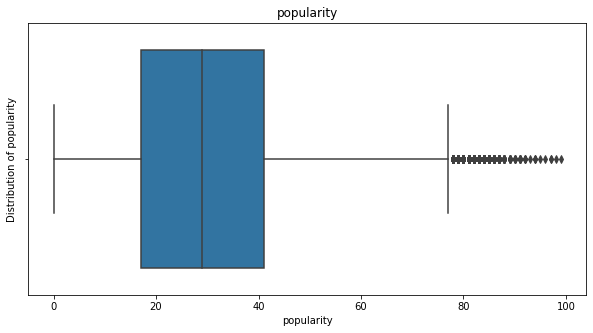

IQR of duration_ms: 85729.0
Lower bound of duration_ms: 48703.5
Upper bound of duration_ms: 391619.5
Number of outliers in duration_ms: 16892

Number of rows after removing outliers: 414037


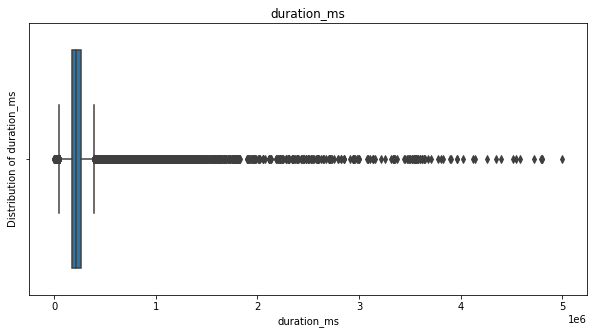

IQR of artist_followers: 627465.0
Lower bound of artist_followers: -920310.5
Upper bound of artist_followers: 1589549.5
Number of outliers in artist_followers: 57856

Number of rows after removing outliers: 356181


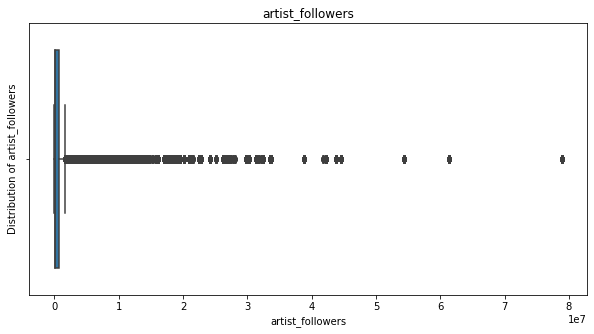

IQR of danceability: 0.21600000000000003
Lower bound of danceability: 0.14299999999999996
Upper bound of danceability: 1.0070000000000001
Number of outliers in danceability: 1441

Number of rows after removing outliers: 354740


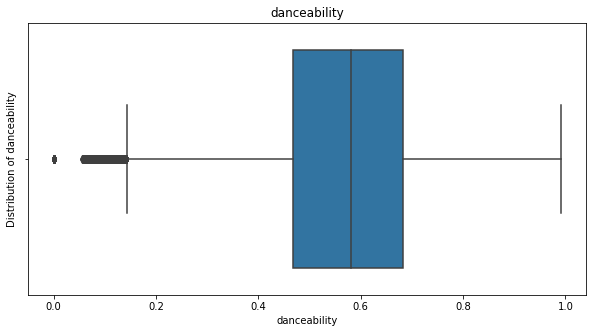

IQR of energy: 0.38
Lower bound of energy: -0.19700000000000006
Upper bound of energy: 1.323
Number of outliers in energy: 0

Number of rows after removing outliers: 354740


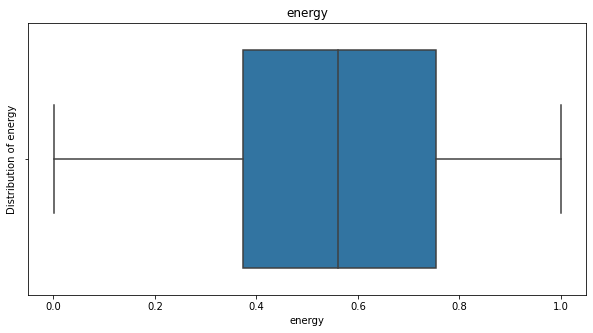

IQR of loudness: 5.916
Lower bound of loudness: -21.303
Upper bound of loudness: 2.3610000000000007
Number of outliers in loudness: 6477

Number of rows after removing outliers: 348262


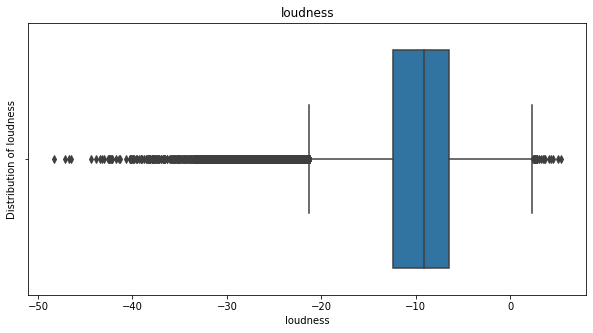

IQR of speechiness: 0.0362
Lower bound of speechiness: -0.0215
Upper bound of speechiness: 0.1233
Number of outliers in speechiness: 47628

Number of rows after removing outliers: 300634


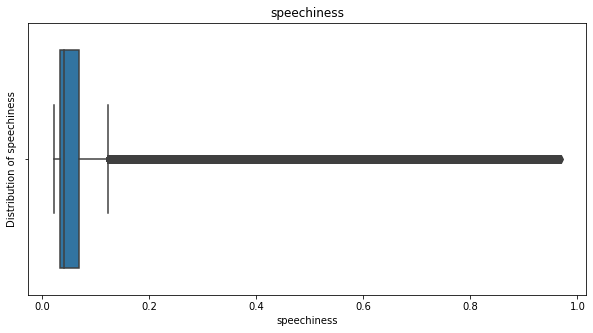

IQR of acousticness: 0.6431
Lower bound of acousticness: -0.87675
Upper bound of acousticness: 1.69565
Number of outliers in acousticness: 0

Number of rows after removing outliers: 300634


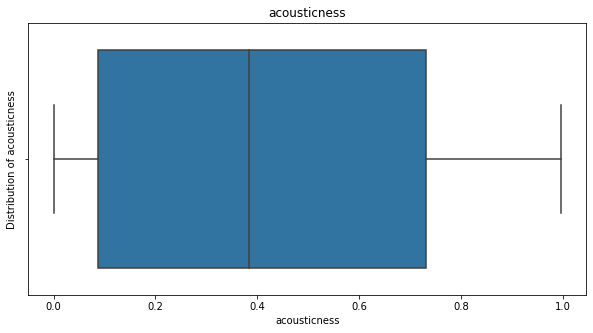

IQR of instrumentalness: 0.00389
Lower bound of instrumentalness: -0.005835
Upper bound of instrumentalness: 0.009725
Number of outliers in instrumentalness: 64430

Number of rows after removing outliers: 236204


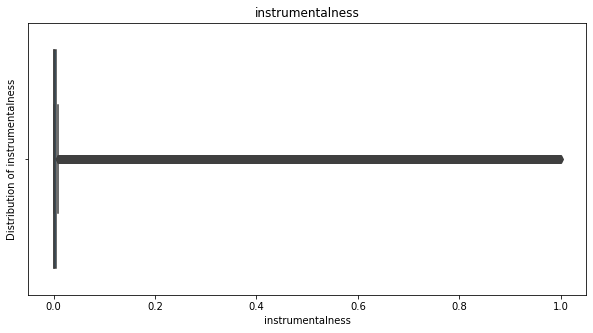

IQR of liveness: 0.1602
Lower bound of liveness: -0.14450000000000002
Upper bound of liveness: 0.4963
Number of outliers in liveness: 13557

Number of rows after removing outliers: 222647


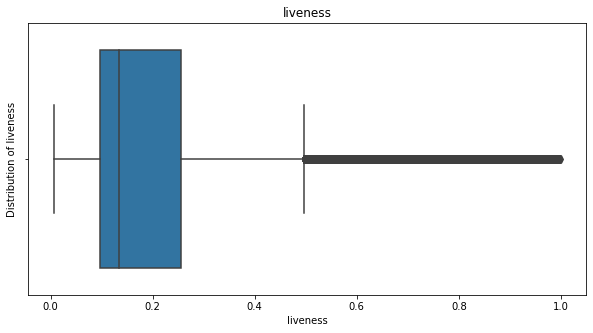

IQR of valence: 0.42700000000000005
Lower bound of valence: -0.26650000000000007
Upper bound of valence: 1.4415
Number of outliers in valence: 0

Number of rows after removing outliers: 222647


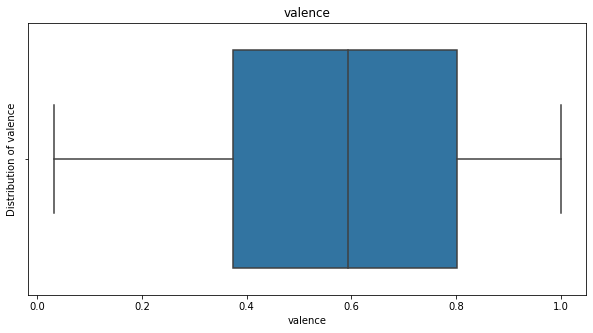

IQR of tempo: 39.61250000000001
Lower bound of tempo: 38.86974999999998
Upper bound of tempo: 197.31975000000003
Number of outliers in tempo: 2154

Number of rows after removing outliers: 220493


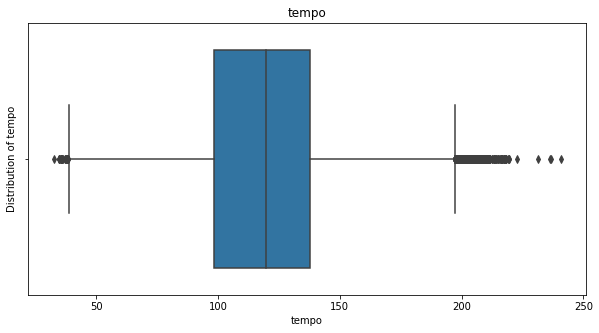

In [170]:
## find outliers
## list of attributes
attributes = ['popularity', 'duration_ms', 'artist_followers', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

## heading level 2 
document.add_heading("Outliers in Attributes", level=2)

## plot
for idx,i in enumerate(attributes):
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("Distribution of "+i)
    ## save
    plt.savefig('./images/{}.png'.format(i))

    ## Find IQR and outliers
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    print("IQR of {}: {}".format(i, iqr))
    ## find outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print("Lower bound of {}: {}".format(i, lower_bound))
    print("Upper bound of {}: {}".format(i, upper_bound))
    print("Number of outliers in {}: {}".format(i, len(df[(df[i] < lower_bound) | (df[i] > upper_bound)])))
    print("")
    # remove outliers
    df = df[(df[i] > lower_bound) & (df[i] < upper_bound)]
    print("Number of rows after removing outliers: {}".format(len(df)))


    ## add to document
    ## add image
    document.add_picture('./images/{}.png'.format(i), width=Inches(6.5))
    ## add line break
    document.add_paragraph()
    ## add caption
    document.add_paragraph("Figure {}: Outliers in {}".format(idx+25, i))
    ## add line break
    document.add_paragraph()
    ## add IQR and outliers
    document.add_paragraph("IQR of {}: {}".format(i, iqr))
    document.add_paragraph("Lower bound of {}: {}".format(i, lower_bound))
    document.add_paragraph("Upper bound of {}: {}".format(i, upper_bound))
    document.add_paragraph("Number of outliers in {}: {}".format(i, len(df[(df[i] < lower_bound) | (df[i] > upper_bound)])))
    document.add_paragraph("Number of rows after removing outliers: {}".format(len(df)))
    
    ## add line break
    document.add_paragraph()

    plt.show()




In [171]:
df.shape

(220493, 15)

## SKEWNESS KURTOSIS

Skewness of popularity: 0.19485388525791264
Kurtosis of popularity: -0.5512547122686757
Percentage of popularity that is explained by the model: -25.664333783428596%
popularity is right skewed
popularity is light kurtic
Explained variance of popularity is -25.664333783428596%


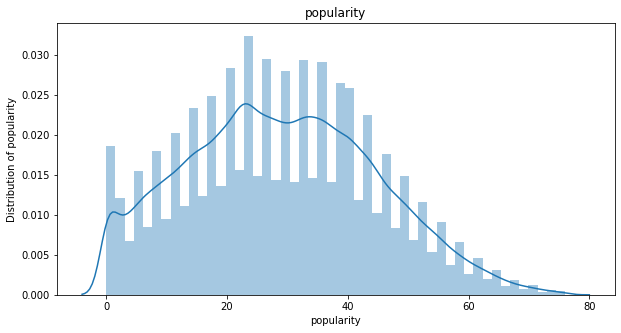

Skewness of duration_ms: 0.23495920933860417
Kurtosis of duration_ms: 0.036169331182199116
Percentage of duration_ms that is explained by the model: 4.568758061761057%
duration_ms is right skewed
duration_ms is heavy kurtic
Explained variance of duration_ms is 4.568758061761057%


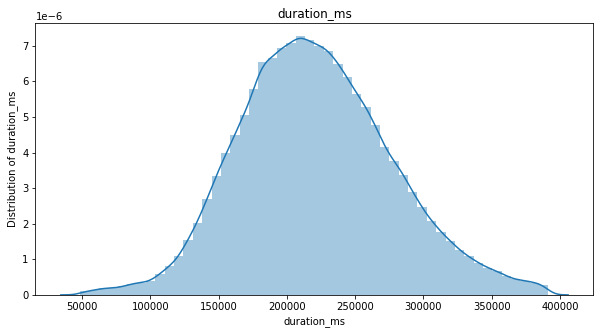

Skewness of danceability: -0.22632054633424514
Kurtosis of danceability: -0.28491546974230886
Percentage of danceability that is explained by the model: -11.684724002463883%
danceability is left skewed
danceability is light kurtic
Explained variance of danceability is -11.684724002463883%


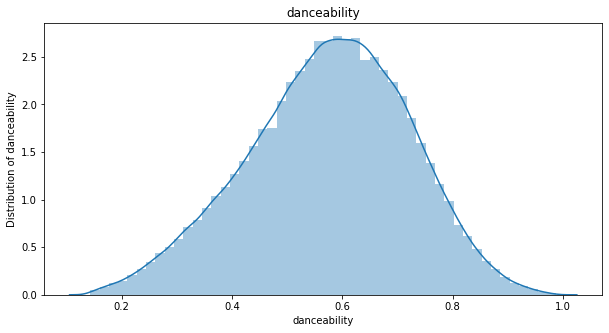

Skewness of energy: -0.12124795028674674
Kurtosis of energy: -0.8851387575697802
Percentage of energy that is explained by the model: -43.52188460605214%
energy is left skewed
energy is light kurtic
Explained variance of energy is -43.52188460605214%


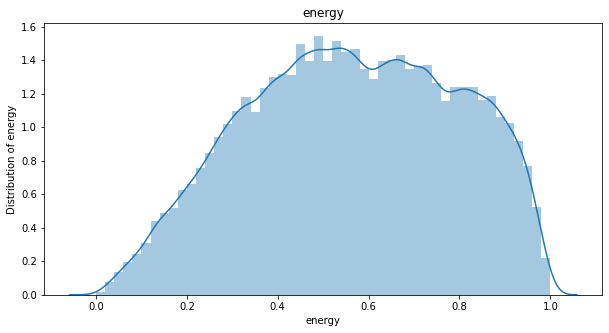

Skewness of loudness: -0.5313310716513595
Kurtosis of loudness: -0.15303977748422248
Percentage of loudness that is explained by the model: 6.463646510897983%
loudness is left skewed
loudness is light kurtic
Explained variance of loudness is 6.463646510897983%


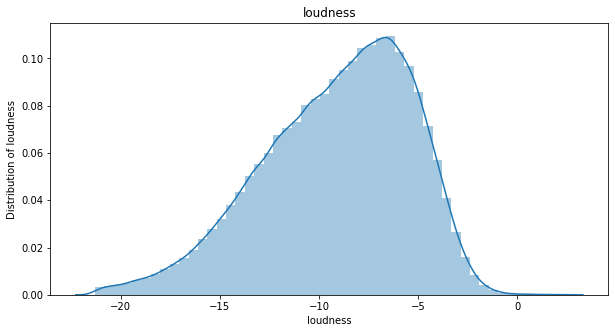

Skewness of speechiness: 1.6864359896138201
Kurtosis of speechiness: 2.4919656680577726
Percentage of speechiness that is explained by the model: 266.8016007561259%
speechiness is right skewed
speechiness is heavy kurtic
Explained variance of speechiness is 266.8016007561259%


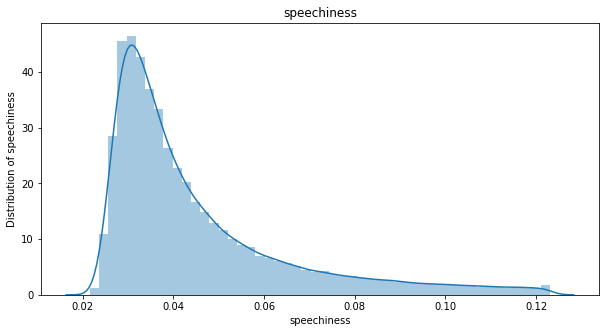

Skewness of acousticness: 0.24611453675273115
Kurtosis of acousticness: -1.322162454442964
Percentage of acousticness that is explained by the model: -63.079504462097624%
acousticness is right skewed
acousticness is light kurtic
Explained variance of acousticness is -63.079504462097624%


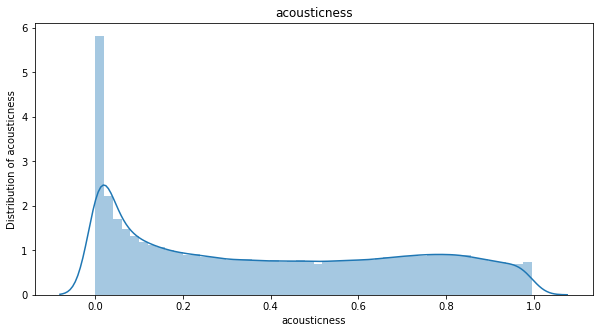

Skewness of instrumentalness: 3.835252058160754
Kurtosis of instrumentalness: 15.392531819512117
Percentage of instrumentalness that is explained by the model: 1505.0845084569207%
instrumentalness is right skewed
instrumentalness is heavy kurtic
Explained variance of instrumentalness is 1505.0845084569207%


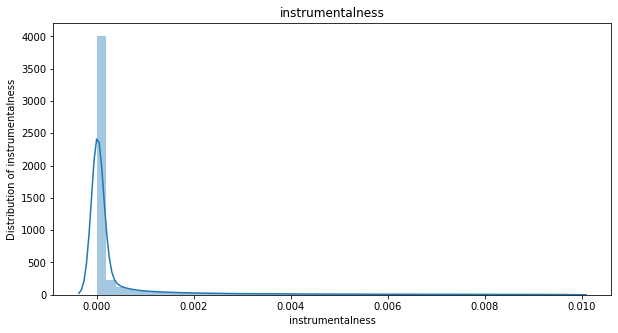

Skewness of liveness: 1.053307911041936
Kurtosis of liveness: 0.20931746516942473
Percentage of liveness that is explained by the model: 65.9387510316476%
liveness is right skewed
liveness is heavy kurtic
Explained variance of liveness is 65.9387510316476%


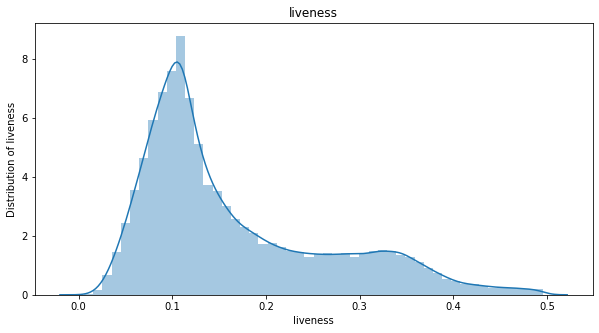

Skewness of valence: -0.15132276330375957
Kurtosis of valence: -1.1096571836875138
Percentage of valence that is explained by the model: -54.337930249681406%
valence is left skewed
valence is light kurtic
Explained variance of valence is -54.337930249681406%


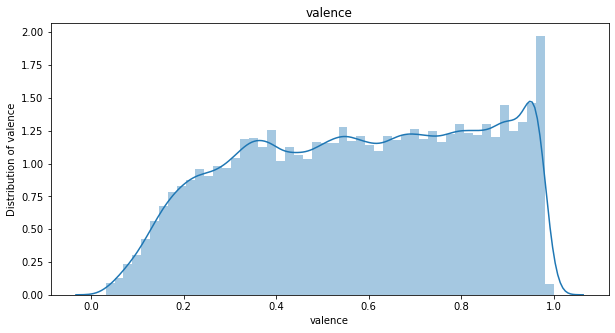

Skewness of tempo: 0.330900215958295
Kurtosis of tempo: -0.3978974881350088
Percentage of tempo that is explained by the model: -14.420126760688126%
tempo is right skewed
tempo is light kurtic
Explained variance of tempo is -14.420126760688126%


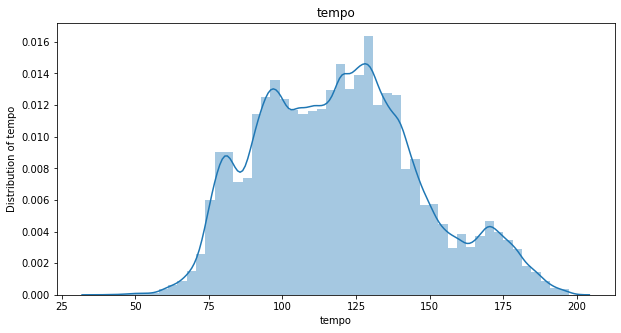

Skewness of artist_followers: 1.8289853133778795
Kurtosis of artist_followers: 2.638846768690216
Percentage of artist_followers that is explained by the model: 299.2017022621098%
artist_followers is right skewed
artist_followers is heavy kurtic
Explained variance of artist_followers is 299.2017022621098%


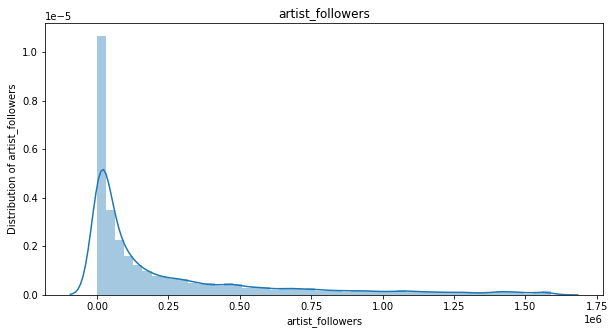

In [172]:
## Distribution of attributes
## list of numeric attributes
attributes = df.select_dtypes(include=['float64','int64']).columns

# to docx
document.add_heading('Checking for skewness', 0)
document.add_paragraph(str(df.skew()))

for idx,i in enumerate(attributes):
    plt.figure(figsize=(10,5))
    sns.distplot(df[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("Distribution of "+i)
    ## save
    plt.savefig('./images/{}.png'.format(i))

    ## skewness and kurtosis
    print("Skewness of {}: {}".format(i, df[i].skew()))
    print("Kurtosis of {}: {}".format(i, df[i].kurt()))
    ## inference from skewness and kurtosis
    percentage = (df[i].skew()**2 + df[i].kurt())/2
    print("Percentage of {} that is explained by the model: {}%".format(i, percentage*100))
    print("{} is {} skewed".format(i, "right" if df[i].skew() > 0 else "left"))
    print("{} is {} kurtic".format(i, "heavy" if df[i].kurt() > 0 else "light"))
    print("Explained variance of {} is {}%".format(i, percentage*100))

    
    ## add to document
    ## heading level 2 
    document.add_heading("Distribution of "+i, level=2)
    ## add image
    document.add_picture('./images/{}.png'.format(i), width=Inches(6.5))
    ## add line break
    document.add_paragraph()
    ## add caption
    document.add_paragraph("Figure {}: Distribution of {}".format(idx+12, i))
    ## add line break
    document.add_paragraph()
    ## add skewness and kurtosis
    document.add_paragraph("Skewness of {}: {}".format(i, df[i].skew()))
    document.add_paragraph("Kurtosis of {}: {}".format(i, df[i].kurt()))
    ## add inference from skewness and kurtosis
    document.add_paragraph("Percentage of {} that is explained by the model: {}%".format(i, percentage*100))
    document.add_paragraph("{} is {} skewed".format(i, "right" if df[i].skew() > 0 else "left"))
    document.add_paragraph("{} is {} kurtic".format(i, "heavy" if df[i].kurt() > 0 else "light"))
    document.add_paragraph("Explained variance of {} is {}%".format(i, percentage*100))
    
    ## add line break
    document.add_paragraph()

    plt.show()

In [173]:
df.shape

(220493, 15)

In [174]:
## check for skewness
print("CHECKING FOR SKEWNESS")
print(df.skew())


## remove skewness
df['duration_ms'] = np.log(df['duration_ms'])
df['loudness'] = np.log(df['loudness'])
df['tempo'] = np.log(df['tempo'])
df['valence'] = np.log(df['valence'])
df['acousticness'] = np.log(df['acousticness'])
df['danceability'] = np.log(df['danceability'])
df['energy'] = np.log(df['energy'])
df['instrumentalness'] = np.log(df['instrumentalness'])
df['liveness'] = np.log(df['liveness'])
df['speechiness'] = np.log(df['speechiness'])

## check again
print("CHECKING FOR SKEWNESS AFTER REMOVING SKEWNESS")
print(df.skew())
# to docx
document.add_heading('Checking for skewness after removing skewness', 0)
document.add_paragraph(str(df.skew()))

CHECKING FOR SKEWNESS
popularity          0.194854
duration_ms         0.234959
danceability       -0.226321
energy             -0.121248
loudness           -0.531331
speechiness         1.686436
acousticness        0.246115
instrumentalness    3.835252
liveness            1.053308
valence            -0.151323
tempo               0.330900
artist_followers    1.828985
dtype: float64
CHECKING FOR SKEWNESS AFTER REMOVING SKEWNESS
popularity          0.194854
duration_ms        -0.731793
danceability       -1.050741
energy             -1.504708
loudness           -1.207543
speechiness         0.914945
acousticness       -1.918898
instrumentalness         NaN
liveness            0.040765
valence            -1.159298
tempo              -0.188024
artist_followers    1.828985
dtype: float64


## EXPLORATORY DATA ANALYSIS

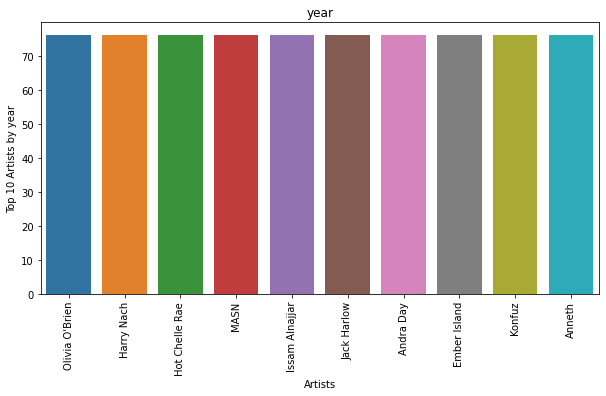

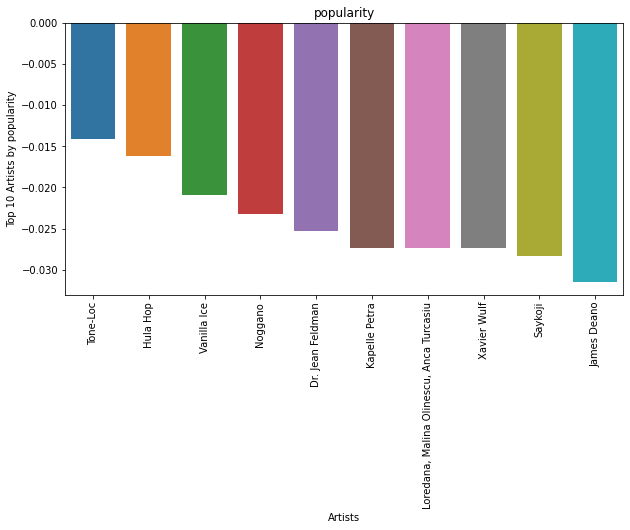

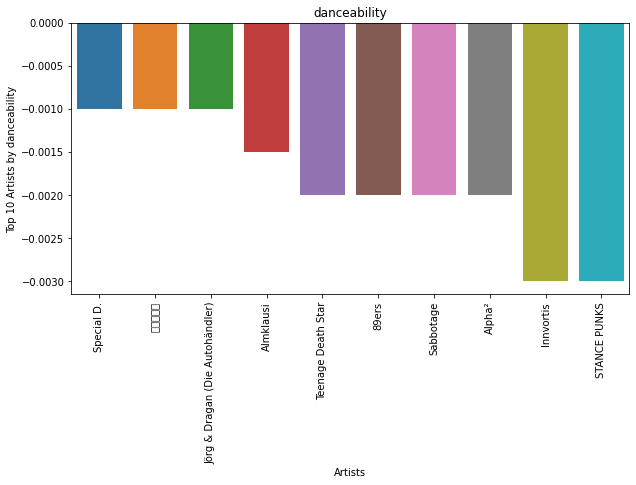

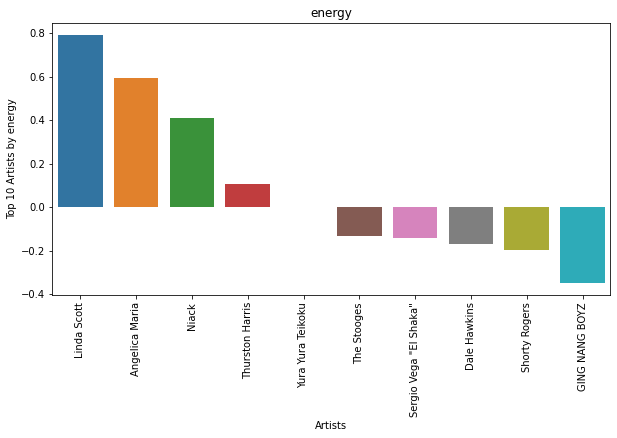

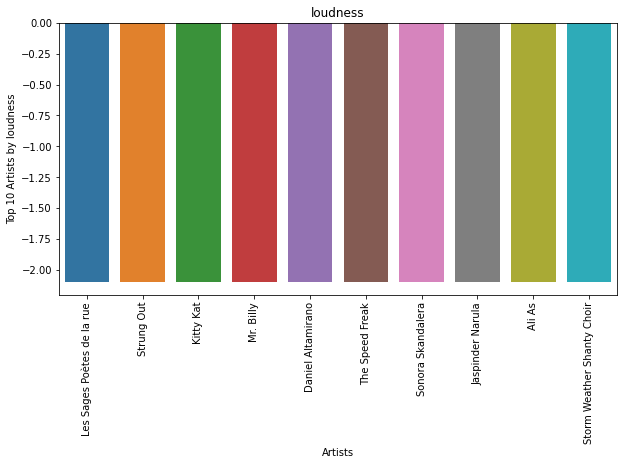

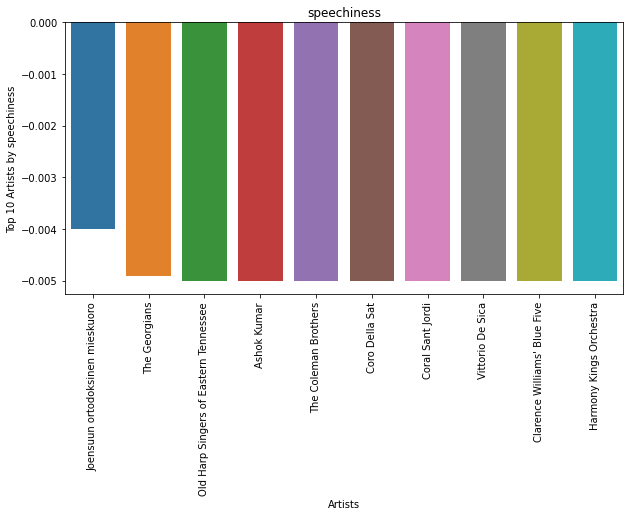

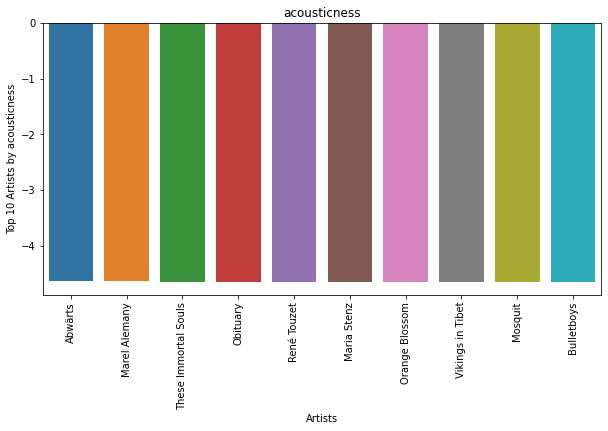

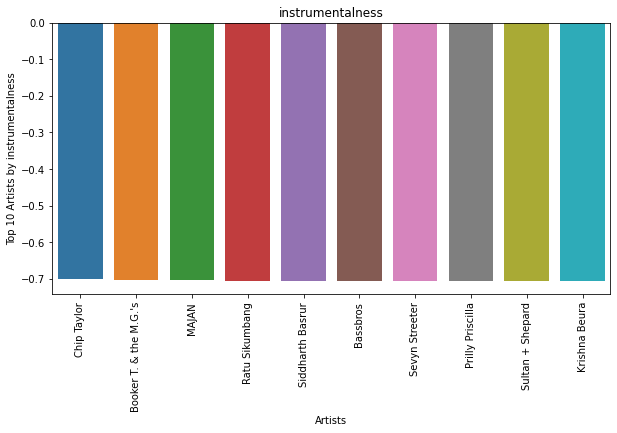

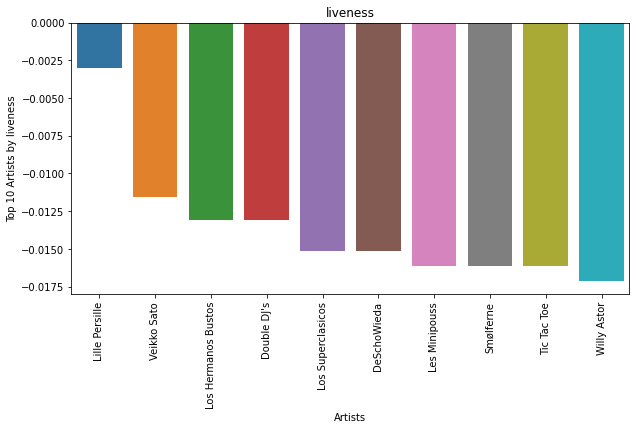

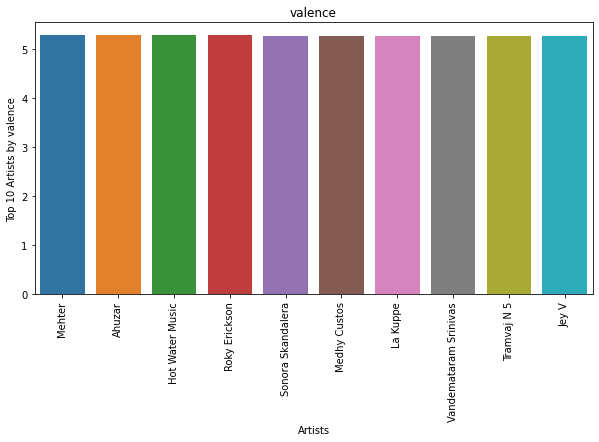

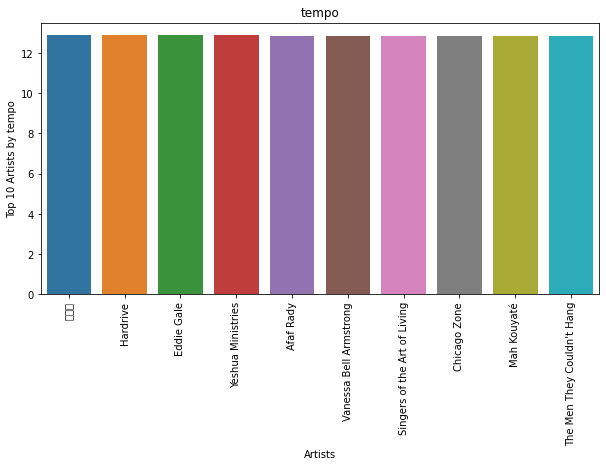

In [175]:
## top 10 artists by 'popularity'
df_top_artists_pop = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)

## top 10 artists by 'danceability'
df_top_artists_dance = df.groupby('artists')['danceability'].mean().sort_values(ascending=False).head(10)

## top 10 artists by 'energy'
df_top_artists_energy = df.groupby('artists')['energy'].mean().sort_values(ascending=False).head(10)

## top 10 artists by 'loudness'
df_top_artists_loudness = df.groupby('artists')['loudness'].mean().sort_values(ascending=False).head(10)

## top 10 artists by 'speechiness'
df_top_artists_speechiness = df.groupby('artists')['speechiness'].mean().sort_values(ascending=False).head(10)

## top 10 artists by 'acousticness'
df_top_artists_acousticness = df.groupby('artists')['acousticness'].mean().sort_values(ascending=False).head(10)

## top 10 artists by 'instrumentalness'
df_top_artists_instrumentalness = df.groupby('artists')['instrumentalness'].mean().sort_values(ascending=False).head(10)

## top 10 artists by 'liveness'
df_top_artists_liveness = df.groupby('artists')['liveness'].mean().sort_values(ascending=False).head(10)

## top 10 artists by 'valence'
df_top_artists_valence = df.groupby('artists')['valence'].mean().sort_values(ascending=False).head(10)

## top 10 artists by 'tempo'
df_top_artists_tempo = df.groupby('artists')['tempo'].mean().sort_values(ascending=False).head(10)

## top 10 artists by 'duration_ms'
df_top_artists_duration_ms = df.groupby('artists')['duration_ms'].mean().sort_values(ascending=False).head(10)

## list of categories
cats = ['year','popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
## plot
for idx,i in enumerate([df_top_artists_pop, df_top_artists_dance, df_top_artists_energy, df_top_artists_loudness, df_top_artists_speechiness, df_top_artists_acousticness, df_top_artists_instrumentalness, df_top_artists_liveness, df_top_artists_valence, df_top_artists_tempo, df_top_artists_duration_ms]):
    plt.figure(figsize=(10,5))
    sns.barplot(x=i.index, y=i.values)
    plt.xticks(rotation=90)
    plt.title(cats[idx])
    plt.xlabel('Artists')
    plt.ylabel("Top 10 Artists by "+cats[idx])
    ## save
    plt.savefig('./images/{}.png'.format(cats[idx]))
    ## add to document
    ## heading level 2 
    document.add_heading("Top 10 Artists by "+cats[idx], level=2)
    ## add image
    document.add_picture('./images/{}.png'.format(cats[idx]), width=Inches(6.5))
    ## add line break
    document.add_paragraph()
    ## add caption
    document.add_paragraph("Figure {}: Top 10 Artists by {}".format(idx+1, cats[idx]))
    ## add the names of the artists
    document.add_paragraph("Top 10 Artists by {}:".format(cats[idx]))
    for j in i.index:
        document.add_paragraph("{}".format(j))
    ## add line break
    document.add_paragraph()

    plt.show()


In [176]:
df.shape

(220493, 15)

In [177]:
## remove nan
# df = df.dropna()

Skewness of popularity: 0.19485388525791264
Kurtosis of popularity: -0.5512547122686757
Percentage of popularity that is explained by the model: -25.664333783428596%
popularity is right skewed
popularity is light kurtic
Explained variance of popularity is -25.664333783428596%


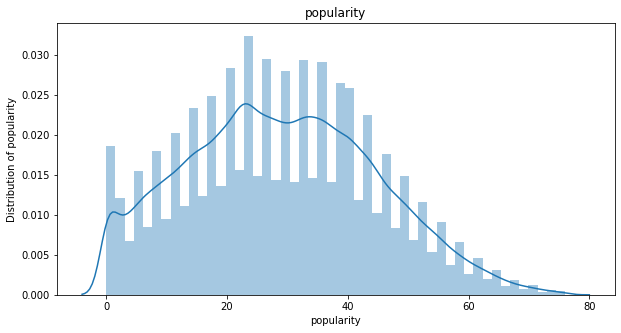

Skewness of duration_ms: -0.7317930676545853
Kurtosis of duration_ms: 1.626612426978673
Percentage of duration_ms that is explained by the model: 108.10667604229907%
duration_ms is left skewed
duration_ms is heavy kurtic
Explained variance of duration_ms is 108.10667604229907%


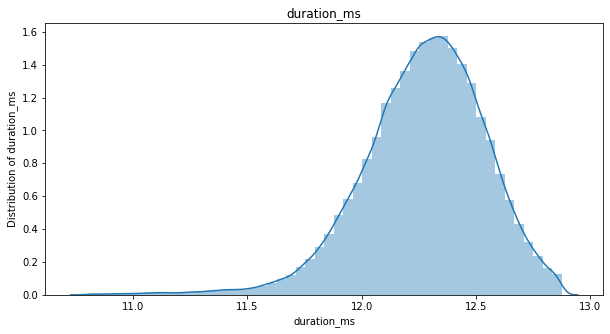

Skewness of danceability: -1.0507412613492833
Kurtosis of danceability: 1.4108740230365
Percentage of danceability that is explained by the model: 125.74656106691916%
danceability is left skewed
danceability is heavy kurtic
Explained variance of danceability is 125.74656106691916%


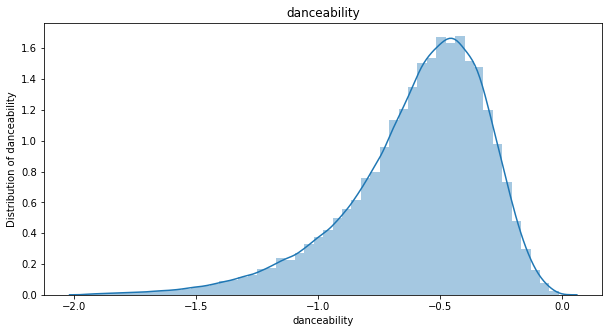

Skewness of energy: -1.5047075500412932
Kurtosis of energy: 3.7170191301399904
Percentage of energy that is explained by the model: 299.05819706456305%
energy is left skewed
energy is heavy kurtic
Explained variance of energy is 299.05819706456305%


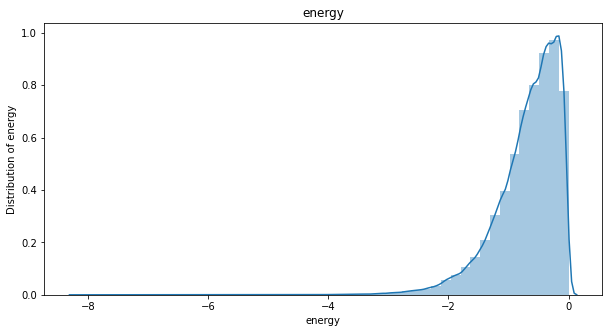

Skewness of loudness: -1.2075431226207183
Kurtosis of loudness: 1.6169149106984833
Percentage of loudness that is explained by the model: 153.7537651843539%
loudness is left skewed
loudness is heavy kurtic
Explained variance of loudness is 153.7537651843539%


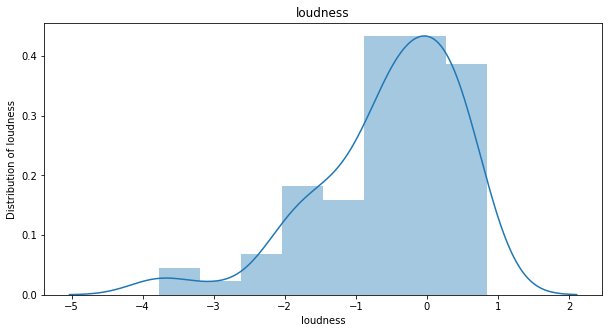

Skewness of speechiness: 0.9149446612401466
Kurtosis of speechiness: 0.10058412584896459
Percentage of speechiness that is explained by the model: 46.88539294904056%
speechiness is right skewed
speechiness is heavy kurtic
Explained variance of speechiness is 46.88539294904056%


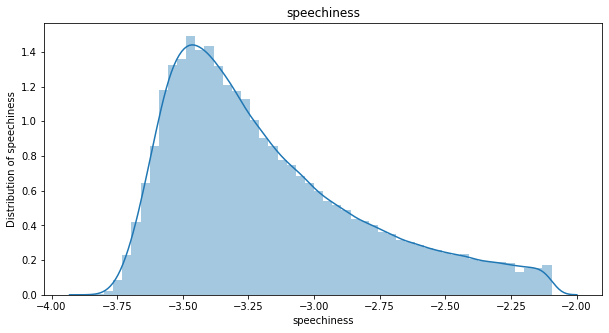

Skewness of acousticness: -1.9188980412012049
Kurtosis of acousticness: 4.139184882753863
Percentage of acousticness that is explained by the model: 391.06772876398423%
acousticness is left skewed
acousticness is heavy kurtic
Explained variance of acousticness is 391.06772876398423%


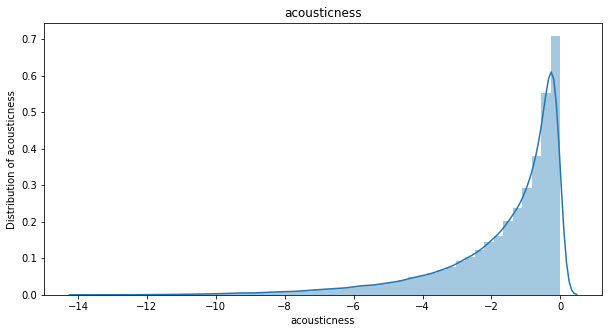

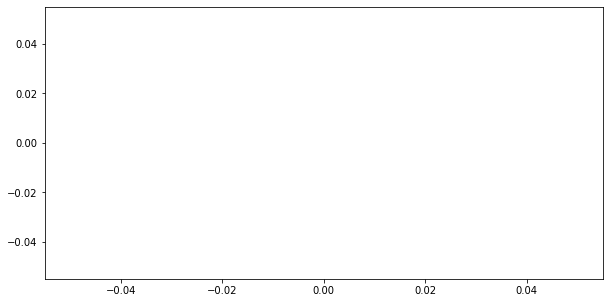

In [178]:
## Distribution of attributes
## list of numeric attributes
attributes = df.select_dtypes(include=['float64','int64']).columns

try:
    for idx,i in enumerate(attributes):
        plt.figure(figsize=(10,5))
        sns.distplot(df[i])
        plt.title(i)
        plt.xlabel(i)
        plt.ylabel("Distribution of "+i)
        ## save
        plt.savefig('./images/{}.png'.format(i))

        ## skewness and kurtosis
        print("Skewness of {}: {}".format(i, df[i].skew()))
        print("Kurtosis of {}: {}".format(i, df[i].kurt()))
        ## inference from skewness and kurtosis
        percentage = (df[i].skew()**2 + df[i].kurt())/2
        print("Percentage of {} that is explained by the model: {}%".format(i, percentage*100))
        print("{} is {} skewed".format(i, "right" if df[i].skew() > 0 else "left"))
        print("{} is {} kurtic".format(i, "heavy" if df[i].kurt() > 0 else "light"))
        print("Explained variance of {} is {}%".format(i, percentage*100))

        
        ## add to document
        ## heading level 2 
        document.add_heading("Distribution of "+i, level=2)
        ## add image
        document.add_picture('./images/{}.png'.format(i), width=Inches(6.5))
        ## add line break
        document.add_paragraph()
        ## add caption
        document.add_paragraph("Figure {}: Distribution of {}".format(idx+12, i))
        ## add line break
        document.add_paragraph()
        ## add skewness and kurtosis
        document.add_paragraph("Skewness of {}: {}".format(i, df[i].skew()))
        document.add_paragraph("Kurtosis of {}: {}".format(i, df[i].kurt()))
        ## add inference from skewness and kurtosis
        document.add_paragraph("Percentage of {} that is explained by the model: {}%".format(i, percentage*100))
        document.add_paragraph("{} is {} skewed".format(i, "right" if df[i].skew() > 0 else "left"))
        document.add_paragraph("{} is {} kurtic".format(i, "heavy" if df[i].kurt() > 0 else "light"))
        document.add_paragraph("Explained variance of {} is {}%".format(i, percentage*100))
        
        ## add line break
        document.add_paragraph()

        plt.show()

except:
    pass

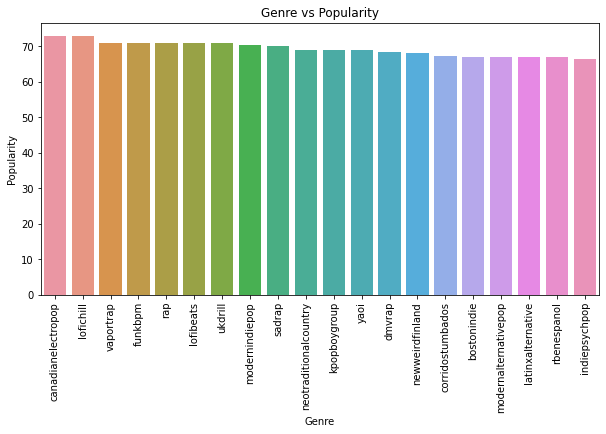

In [179]:
## group by Genre
df_genre = df.groupby('genres').mean()
df_genre

## plot
plt.figure(figsize=(10,5))
## bar plot of top 20 genres by popularity
sns.barplot(x=df_genre['popularity'].sort_values(ascending=False).head(20).index, y=df_genre['popularity'].sort_values(ascending=False).head(20).values)
plt.title("Genre vs Popularity")
plt.xlabel("Genre")
plt.ylabel("Popularity")
## rotate xticks
plt.xticks(rotation=90)
## save
plt.savefig('./images/genre.png')
## add to document
## heading level 2
document.add_heading("Distribution by Genre : top 20", level=2)
## add image
document.add_picture('./images/genre.png', width=Inches(6.5))
## add line break
document.add_paragraph()
## add caption
document.add_paragraph("Figure 23: Genre")
## add line break
document.add_paragraph()


In [180]:
## unique genres
genres = df['genres'].unique()
## list of genres
genres_list = []
for i in genres:
    for j in i.split(','):
        genres_list.append(j)
## unique genres
genres_list = list(set(genres_list))

print("Number of unique genres: {}".format(len(genres_list)))
document.add_paragraph("Number of unique genres: {}".format(len(genres_list)))


Number of unique genres: 2764


In [181]:
print("Skewness of Genre: {}".format(df_genre['popularity'].skew()))
print("Kurtosis of Genre: {}".format(df_genre['popularity'].kurt()))
## inference from skewness and kurtosis
percentage = (df_genre['popularity'].skew()**2 + df_genre['popularity'].kurt())/2
print("Percentage of Genre that is explained by the model: {}%".format(percentage*100))
print("Genre is {} skewed".format("right" if df_genre['popularity'].skew() > 0 else "left"))
print("Genre is {} kurtic".format("heavy" if df_genre['popularity'].kurt() > 0 else "light"))
print("Explained variance of Genre is {}%".format(percentage*100))

## add line break
document.add_paragraph()
## add skewness and kurtosis
document.add_paragraph("Skewness of Genre: {}".format(df_genre['popularity'].skew()))
document.add_paragraph("Kurtosis of Genre: {}".format(df_genre['popularity'].kurt()))
## add inference from skewness and kurtosis
document.add_paragraph("Percentage of Genre that is explained by the model: {}%".format(percentage*100))
document.add_paragraph("Genre is {} skewed".format("right" if df_genre['popularity'].skew() > 0 else "left"))
document.add_paragraph("Genre is {} kurtic".format("heavy" if df_genre['popularity'].kurt() > 0 else "light"))  
document.add_paragraph("Explained variance of Genre is {}%".format(percentage*100))

## add line break
document.add_paragraph()    

plt.show()

Skewness of Genre: -0.016321664185123312
Kurtosis of Genre: -0.4608136808885739
Percentage of Genre that is explained by the model: -23.0273642083401%
Genre is left skewed
Genre is light kurtic
Explained variance of Genre is -23.0273642083401%


## CORELATION ANALYSIS

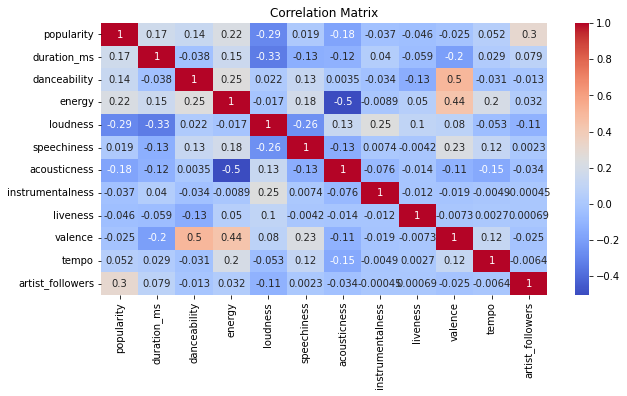

In [182]:

## plot
plt.figure(figsize=(10,5))
sns.heatmap(df[attributes].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('./images/correlation_matrix.png')

## add to document
## heading level 2
document.add_heading("Correlation Matrix", level=2)
## add image
document.add_picture('./images/correlation_matrix.png', width=Inches(6.5))
## add line break
document.add_paragraph()
## add caption
document.add_paragraph("Figure 24: Correlation Matrix")
## add line break
document.add_paragraph()

plt.show()

In [183]:
## top 5 most correlated attributes with 'popularity'
print("Top 5 most correlated attributes with 'popularity':")
print(df[attributes].corr()['popularity'].sort_values(ascending=False)[1:6])

## add to document
## add line break
document.add_paragraph()
## add top 5 most correlated attributes with 'popularity'
document.add_paragraph("Top 5 most correlated attributes with 'popularity':")
document.add_paragraph(str(df[attributes].corr()['popularity'].sort_values(ascending=False)[1:6]))
## add line break
document.add_paragraph()

most_corr = df[attributes].corr()['popularity'].sort_values(ascending=False)[1:6].index

Top 5 most correlated attributes with 'popularity':
artist_followers    0.304467
energy              0.224893
duration_ms         0.167718
danceability        0.136468
tempo               0.052307
Name: popularity, dtype: float64


## STANDARDIZE DATA

In [184]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[most_corr])

# transform the data
df[most_corr] = df_scaled


In [185]:
## remove any remaining outliers
from scipy import stats
df = df[(np.abs(stats.zscore(df[most_corr])) < 3).all(axis=1)]


## 1. COLLABOARITIVE BASED FILTERING : RECOMMENDATION SYSTEM with K-Means Clustering

In [186]:
## heading level 1
document.add_heading("1. COLLABOARITIVE BASED FILTERING : RECOMMENDATION SYSTEM with K-Means Clustering", level=1)

Elbow Method is the method of choosing the optimal number of clusters for k-means clustering. The optimal number of clusters is the number of clusters where the WCSS (Within Cluster Sum of Squares) doesn't decrease significantly with every iteration. From the graph, we can see that the optimal number of clusters is 10.
WCSS is the sum of the squared distances between each member of the cluster and its centroid. The idea is to minimize the WCSS, because it indicates how close the data points are to their cluster centroid. A small WCSS value indicates that the data points are closer to their respective centroids, which in turn forms the dense cluster.
WCSS: [853336.7492215664, 704826.8807338084, 605420.1886861518, 523174.23122907226, 464943.6726374435, 428652.0737788374, 402055.3316129057, 381701.9096424368, 364308.03838601796, 350407.26627307036]
Optimal number of clusters : 10
This is the point where the elbow occurs in the graph.


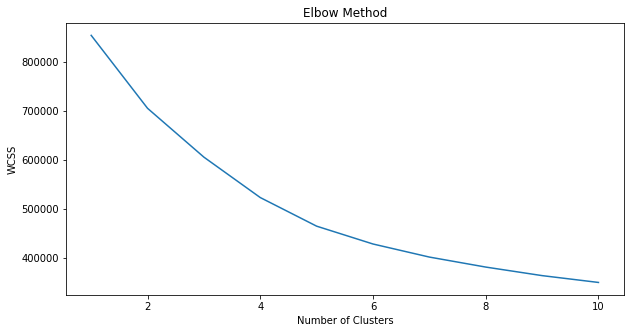

In [187]:
## Kmeans Clustering

from sklearn.cluster import KMeans

## elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[most_corr])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.savefig('./images/elbow_method.png')

## print optimal number of clusters
print("Elbow Method is the method of choosing the optimal number of clusters for k-means clustering. The optimal number of clusters is the number of clusters where the WCSS (Within Cluster Sum of Squares) doesn't decrease significantly with every iteration. From the graph, we can see that the optimal number of clusters is {}.".format(wcss.index(min(wcss))+1))   
print("WCSS is the sum of the squared distances between each member of the cluster and its centroid. The idea is to minimize the WCSS, because it indicates how close the data points are to their cluster centroid. A small WCSS value indicates that the data points are closer to their respective centroids, which in turn forms the dense cluster.")
print("WCSS: {}".format(wcss))
print("Optimal number of clusters : {}".format(np.argmin(wcss)+1))
print("This is the point where the elbow occurs in the graph.")

## add to document
## heading level 2
document.add_heading("Elbow Method", level=2)
## add image
document.add_picture('./images/elbow_method.png', width=Inches(6.5))
## add line break
document.add_paragraph()
## add caption
document.add_paragraph("Figure 36: Elbow Method")
## add line break
document.add_paragraph()
## add elbow method
document.add_paragraph("Elbow Method is the method of choosing the optimal number of clusters for k-means clustering. The optimal number of clusters is the number of clusters where the WCSS (Within Cluster Sum of Squares) doesn't decrease significantly with every iteration. From the graph, we can see that the optimal number of clusters is {}.".format(np.argmin(wcss)+1))
document.add_paragraph("WCSS is the sum of the squared distances between each member of the cluster and its centroid. The idea is to minimize the WCSS, because it indicates how close the data points are to their cluster centroid. A small WCSS value indicates that the data points are closer to their respective centroids, which in turn forms the dense cluster.")
document.add_paragraph("WCSS: {}".format(wcss))
document.add_paragraph("Optimal number of clusters : {}".format(np.argmin(wcss)+1))
document.add_paragraph("This is the point where the elbow occurs in the graph.")
## add line break
document.add_paragraph()

optimal_k = np.argmin(wcss)+1
plt.show()

Number of rows in each cluster:
1    35240
2    28472
6    26448
4    22005
7    21601
8    17594
9    15353
0    14952
5    14004
3    11290
Name: cluster, dtype: int64


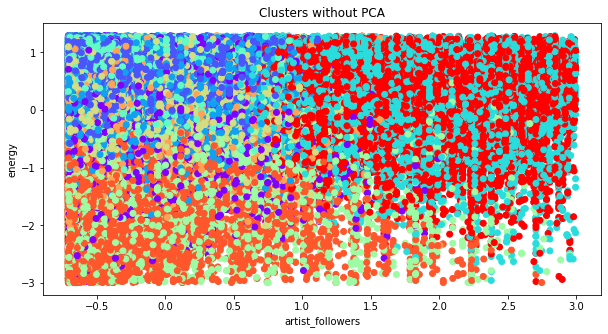

In [188]:

km = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42) ## kmeans clustering with optimal number of clusters
km.fit(df[most_corr]) ## fit
df['cluster'] = km.labels_ ## add cluster column

print("Number of rows in each cluster:")
print(df['cluster'].value_counts())

## add to document
## add line break
document.add_paragraph()
## add number of rows in each cluster
document.add_paragraph("Number of rows in each cluster:")
document.add_paragraph(str(df['cluster'].value_counts()))
## add line break
document.add_paragraph()

## plot clusters
plt.figure(figsize=(10,5))
plt.scatter(df[most_corr[0]], df[most_corr[1]], c=df['cluster'], cmap='rainbow')
plt.title("Clusters without PCA")
plt.xlabel(most_corr[0])
plt.ylabel(most_corr[1])
plt.savefig('./images/clusters.png')

## add to document
## heading level 2
document.add_heading("Clusters", level=2)
## add image
document.add_picture('./images/clusters.png', width=Inches(6.5))
## add line break
document.add_paragraph()
## add caption
document.add_paragraph("Figure 37: Clusters")
## add line break
document.add_paragraph()

plt.show()

The first 1 principal components explain 26.31% of the variance in the data.
The first 2 principal components explain 49.39% of the variance in the data.
The first 3 principal components explain 70.75% of the variance in the data.
The first 4 principal components explain 87.34% of the variance in the data.


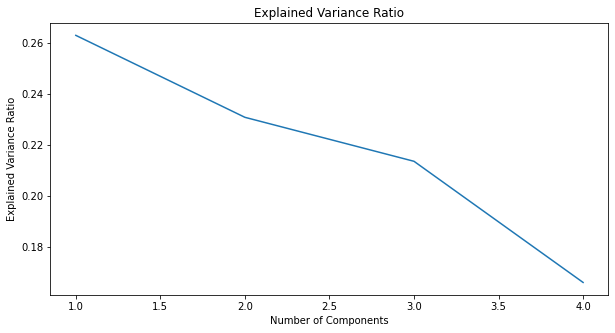

In [189]:
## PCA (Principal Component Analysis)

from sklearn.decomposition import PCA

## PCA
pca = PCA(n_components=4)
pca.fit(df[most_corr])
df_pca = pca.transform(df[most_corr])

## plot explained variance ratio
plt.figure(figsize=(10,5))
plt.plot(range(1, 5), pca.explained_variance_ratio_)
plt.title("Explained Variance Ratio")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.savefig('./images/explained_variance_ratio.png')

## add to document
## heading level 2
document.add_heading("Explained Variance Ratio", level=2)
## add image
document.add_picture('./images/explained_variance_ratio.png', width=Inches(6.5))
## add line break
document.add_paragraph()
## add caption
document.add_paragraph("Figure 38: Explained Variance Ratio")
## add line break
document.add_paragraph()

# Inferece:
for i in range(1, 5):
    print("The first {} principal components explain {}% of the variance in the data.".format(i, round(sum(pca.explained_variance_ratio_[:i])*100, 2)))

## add to document
## add line break
document.add_paragraph()
## add inference
document.add_paragraph("The first {} principal components explain {}% of the variance in the data.".format(1, round(sum(pca.explained_variance_ratio_[:1])*100, 2)))
## add line break
document.add_paragraph()

plt.show()

optimal_k = np.argmin(wcss)+1 ## optimal number of clusters

The first 1 principal components explain 26.31% of the variance in the data.
The first 2 principal components explain 49.39% of the variance in the data.
The first 3 principal components explain 70.75% of the variance in the data.
The first 4 principal components explain 87.34% of the variance in the data.


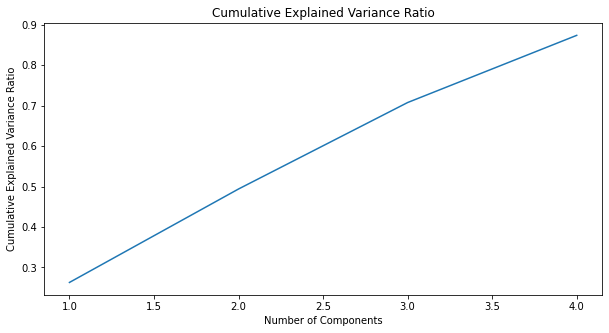

In [190]:
## plot cumulative explained variance ratio
plt.figure(figsize=(10,5))
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.savefig('./images/cumulative_explained_variance_ratio.png')

## add to document
## heading level 2
document.add_heading("Cumulative Explained Variance Ratio", level=2)
## add image
document.add_picture('./images/cumulative_explained_variance_ratio.png', width=Inches(6.5))
## add line break
document.add_paragraph()
## add caption
document.add_paragraph("Figure 39: Cumulative Explained Variance Ratio")
## add line break
document.add_paragraph()

# Inferece:
for i in range(1, 5):
    print("The first {} principal components explain {}% of the variance in the data.".format(i, round(sum(pca.explained_variance_ratio_[:i])*100, 2)))

## add to document
## add line break
document.add_paragraph()
## add inference
document.add_paragraph("The first {} principal components explain {}% of the variance in the data.".format(1, round(sum(pca.explained_variance_ratio_[:1])*100, 2)))
## add line break
document.add_paragraph()

plt.show()

Number of rows in each cluster:
3    37139
0    26976
2    25041
9    24158
5    22334
6    18508
7    16271
4    12747
1    12612
8    11173
Name: cluster_pca, dtype: int64


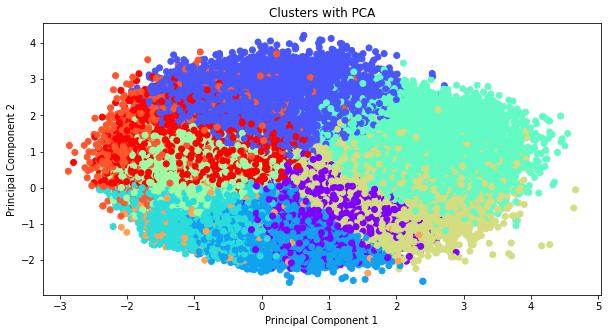

In [191]:
## Kmeans clustering with PCA
km = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42) ## kmeans clustering with optimal number of clusters
km.fit(df_pca) ## fit
df['cluster_pca'] = km.labels_ ## add cluster column

print("Number of rows in each cluster:")
print(df['cluster_pca'].value_counts())

## add to document
## add line break
document.add_paragraph()
## add number of rows in each cluster
document.add_paragraph("Number of rows in each cluster:")
document.add_paragraph(str(df['cluster_pca'].value_counts()))
## add line break
document.add_paragraph()

## plot clusters
plt.figure(figsize=(10,5))
plt.scatter(df_pca[:,0], df_pca[:,1], c=df['cluster_pca'], cmap='rainbow')
plt.title("Clusters with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig('./images/clusters_pca.png')

## add to document
## heading level 2
document.add_heading("Clusters", level=2)
## add image
document.add_picture('./images/clusters_pca.png', width=Inches(6.5))
## add line break
document.add_paragraph()
## add caption
document.add_paragraph("Figure 40: Clusters")
## add line break
document.add_paragraph()

plt.show()

In [192]:
## Recommendation System (Content Based) on KNN (K-Nearest Neighbors) Algorithm

from sklearn.neighbors import NearestNeighbors
## replace NaN with empty string
df['genres'] = df['genres'].fillna('')
df['artists'] = df['artists'].fillna('') 


## take 10 random indices from the dataset to get recommendations for them (10 random rows)
random_indices = np.random.choice(len(df), 10)

document.add_heading("Recommendations (CONTEXT BASED) :  KNN (K-Nearest Neighbors) Algorithm", level=1)

## KNN
knn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
knn.fit(df[most_corr])


## get recommendations
for i in random_indices:
    distances, indices = knn.kneighbors([df.iloc[i][most_corr]])
    print("Recommendations for {}: by  {}".format(df.iloc[i]['name'], df.iloc[i]['artists']))
    document.add_paragraph("Recommendations for {}: by  {}".format(df.iloc[i]['name'], df.iloc[i]['artists']))
    ## create a df for recommendations
    df_rec_knn = pd.DataFrame(columns=['name', 'artists', 'genres'])
    for j in indices[0]:
        df_rec_knn = df_rec_knn.append(df.iloc[j][['name', 'artists', 'genres']])
    print(df_rec_knn)
    
    ## add table to document
    document.add_table(df_rec_knn.shape[0]+1, df_rec_knn.shape[1])
    table = document.tables[-1]
    for j in range(df_rec_knn.shape[-1]):
        table.cell(0,j).text = df_rec_knn.columns[j]
    for j in range(df_rec_knn.shape[0]):
        for k in range(df_rec_knn.shape[-1]):
            table.cell(j+1,k).text = str(df_rec_knn.values[j,k])
    ## add line break
    document.add_paragraph()
    print()
    


Recommendations for O anzol: by  Rádio Macau
                            name                           artists  \
128444                   O anzol                       Rádio Macau   
339213              Blanke Mjøsa            Vazelina Bilopphøggers   
359543          Si Tu Me Olvidas       Tito del Salto con Rondalla   
479703          Oh! Bella Tarija  Los Embajadores del Guadalquivir   
358617         Soldado de Levita              Trio Los Embajadores   
455395      Ooit Komt Nooit Meer                      Jaap Reesema   
471948  Cuando Llora Mi Guitarra                Carlos Torres Vila   
416352                      不虧不欠                           Tia Ray   
430388           Não Chores Mais                        Jair Pires   
346002    Yo me estoy enamorando                        Pansequito   

                     genres  
128444       portugueserock  
339213  classicnorwegianpop  
359543  folkloreecuatoriano  
479703    folkloreboliviano  
358617  classiccolombianpop  
4553

In [193]:
df.shape

(206959, 17)

## 2. CONTENT BASED FILTERING : RECOMMENDATION SYSTEM with TF-IDF 

In [194]:
df_copy = df.copy()

## keep frandom 1% of the data
df = df.sample(frac=0.1, random_state=42)
# reset index
df.reset_index(drop=True, inplace=True)

In [195]:
# level 1 heading
document.add_heading("2. CONTENT BASED FILTERING : RECOMMENDATION SYSTEM with TF-IDF", level=1)

In [196]:
## TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## TF-IDF Vectorizer based Content Based Filtering
tfidf = TfidfVectorizer(stop_words='english')
df['genres'] = df['genres'].fillna('')
df['artists'] = df['artists'].fillna('')
df['genres_artists'] = df['genres'] + " " + df['artists']
tfidf_matrix = tfidf.fit_transform(df['genres_artists'])
tfidf_matrix.shape

## add to document
## add line break
document.add_paragraph()
## add shape
document.add_paragraph("Shape of TF-IDF Matrix: {}".format(tfidf_matrix.shape))
## add line break
document.add_paragraph()

## Cosine Similarity
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

## add to document
## add line break
document.add_paragraph()
## add shape
document.add_paragraph("Shape of Cosine Similarity Matrix: {}".format(cosine_sim.shape))
## add line break
document.add_paragraph()

## get indices of songs
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

## add to document
## add line break
document.add_paragraph()
## add shape
document.add_paragraph("Indices of Songs: {}".format(indices))

## add line break
document.add_paragraph()

## get recommendations
def get_recommendations(name, cosine_sim=cosine_sim):
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    return df[['name', 'artists', 'genres']].iloc[song_indices]

## take 10 random indices from the dataset to get recommendations for them (10 random rows)
random_indices = np.random.choice(len(df), 10)

## get recommendations
for i in random_indices:
    try:
        print("Recommendations for {}: by  {}".format(df.iloc[i]['name'], df.iloc[i]['artists']))
        document.add_paragraph("Recommendations for {}: by  {}".format(df.iloc[i]['name'], df.iloc[i]['artists']))
        ## create a df for recommendations
        df_rec_tfidf = pd.DataFrame(columns=['name', 'artists', 'genres'])
        df_rec_tfidf = get_recommendations(df.iloc[i]['name'])
        print(df_rec_tfidf )

        ## add table to document
        document.add_table(df_rec_tfidf.shape[0]+1, df_rec_tfidf.shape[1])
        table = document.tables[-1]
        for j in range(df_rec_tfidf.shape[-1]):
            table.cell(0,j).text = df_rec_tfidf.columns[j]
        for j in range(df_rec_tfidf.shape[0]):
            for k in range(df_rec_tfidf.shape[-1]):
                table.cell(j+1,k).text = str(df_rec_tfidf.values[j,k])
        ## add line break
        document.add_paragraph()
        print()
    except:
        continue
    

   


Recommendations for 情憑誰來定錯對: by  Alan Tam
                    name   artists genres
1191             情憑誰來定錯對  Alan Tam   cpop
1282   愛人女神 - 電影《愛人女神》歌曲  Alan Tam   cpop
2231                愛在深秋  Alan Tam   cpop
2741                柔柔河畔  Alan Tam   cpop
3657               酒紅色的心  Alan Tam   cpop
4326               我愛大自然  Alan Tam   cpop
6601                 情兩牽  Alan Tam   cpop
8786               相識非偶然  Alan Tam   cpop
9280               尋樂真數  Alan Tam   cpop
10178               無言感激  Alan Tam   cpop

Recommendations for แค่ไม่อยากเห็น (Tears): by  The White Hair Cut
                                            name      artists          genres
1884                 Don't Make Me Wait Too Long  Barry White  adultstandards
3487                          Let The Music Play  Barry White  adultstandards
13464  You're The First, The Last, My Everything  Barry White  adultstandards
1526                                    ปล่อยวาง   Playground   thaiindierock
10828                  แค่วันพรุ่งนี้ท

In [197]:
## revert back to original dataset
# df = df_copy.copy()

## 3. COLLABORATIVE FILTERING : RECOMMENDATION SYSTEM with SVD (Singular Value Decomposition

In [198]:
# level 1 heading
document.add_heading("3. COLLABORATIVE FILTERING : RECOMMENDATION SYSTEM with SVD (Singular Value Decomposition)", level=1)


In [199]:
## take 1% random sample of the df_pca
len_df_pca = len(df_pca)
## list of random indices
random_indices = np.random.choice(len_df_pca, int(len_df_pca*0.1))
## get random sample, from numpy array
df_pca2 = df_pca[random_indices]

# SVD on df_pca
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=4, random_state=42)
matrix = svd.fit_transform(df_pca2)
matrix.shape

## add to document
## add line break
document.add_paragraph()
## add shape
document.add_paragraph("Shape of SVD Matrix: {}".format(matrix.shape))
## add line break
document.add_paragraph()

## get correlation matrix
corr = np.corrcoef(matrix)
corr.shape

## add to document
## add line break
document.add_paragraph()
## add shape
document.add_paragraph("Shape of Correlation Matrix: {}".format(corr.shape))
## add line break
document.add_paragraph()

## get indices of songs
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

## add to document
## add line break
document.add_paragraph()
## add shape
document.add_paragraph("Indices of Songs: {}".format(indices))

## add line break
document.add_paragraph()

## get recommendations
def get_recommendations(name, corr=corr):
    idx = indices[name]
    sim_scores = list(enumerate(corr[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    return df[['name', 'artists', 'genres']].iloc[song_indices]

## take 10 random indices from the dataset to get recommendations for them (10 random rows)
random_indices = np.random.choice(len(df), 10)

## get recommendations
for i in random_indices:
    try:
        print("Recommendations for {}: by  {}".format(df.iloc[i]['name'], df.iloc[i]['artists']))
        document.add_paragraph("Recommendations for {}: by  {}".format(df.iloc[i]['name'], df.iloc[i]['artists']))
        ## create a df for recommendations
        df_rec_svd = pd.DataFrame(columns=['name', 'artists', 'genres'])
        df_rec_svd = get_recommendations(df.iloc[i]['name'])
        print(df_rec_svd )

        ## add table to document
        document.add_table(df_rec_svd.shape[0]+1, df_rec_svd.shape[1])
        table = document.tables[-1]
        for j in range(df_rec_svd.shape[-1]):
            table.cell(0,j).text = df_rec_svd.columns[j]
        for j in range(df_rec_svd.shape[0]):
            for k in range(df_rec_svd.shape[-1]):
                table.cell(j+1,k).text = str(df_rec_svd.values[j,k])
        ## add line break
        document.add_paragraph()
    
    except:
        continue


Recommendations for Sem Compromisso: by  Chico Buarque
                                name             artists            genres
8168                      Cumhuriyet               Yalın        turkishpop
10339               Sophie De Nantes             Pigalle     frenchfolkpop
17253         たいくつ - Remastered 2018         Yosui Inoue         jacoustic
12625                          Kiler  Elektryczne Gitary  classicpolishpop
4742                          あの丘越えて       Hibari Misora              enka
11919                Libre de Pecado     Alberto Beltran            bolero
10137  Baby It's You - 1993 Remaster         Cilla Black    adultstandards
15871                      Tightrope     The Stone Roses   alternativerock
14055               少し気になったBreakfast  Tsuyoshi Nagabuchi      classicjrock
12276                      Amiga Mia            Jeanette          latinpop
Recommendations for Eye Of The Storm: by  Pretty Maids
                                    name             artists  \
1

## 3. HYBRID METHOD FOR RECOMMENDATION

In [200]:
## HYBRID RECOMMENDATION SYSTEM
# level 1 heading
document.add_heading("4. HYBRID RECOMMENDATION SYSTEM", level=1)

## add line break
document.add_paragraph()

## get recommendations from both svd and tfidf
def get_recommendations_hybrid(name, corr=corr, df_rec_tfidf=df_rec_tfidf):
    idx = indices[name]
    sim_scores = list(enumerate(corr[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    df_rec_svd = df[['name', 'artists', 'genres']].iloc[song_indices]
    df_rec_hybrid = pd.concat([df_rec_tfidf, df_rec_svd]).drop_duplicates()
    return df_rec_hybrid

## take 10 random indices from the dataset to get recommendations for them (10 random rows)
random_indices = np.random.choice(len(df), 10)

## get recommendations
for i in random_indices:
    try:
        print("Recommendations for {}: by  {}".format(df.iloc[i]['name'], df.iloc[i]['artists']))
        document.add_paragraph("Recommendations for {}: by  {}".format(df.iloc[i]['name'], df.iloc[i]['artists']))
        ## create a df for recommendations
        df_rec_hybrid = pd.DataFrame(columns=['name', 'artists', 'genres'])
        df_rec_hybrid = get_recommendations_hybrid(df.iloc[i]['name'])
        print(df_rec_hybrid )

        ## add table to document
        document.add_table(df_rec_hybrid.shape[0]+1, df_rec_hybrid.shape[1])
        table = document.tables[-1]
        for j in range(df_rec_hybrid.shape[-1]):
            table.cell(0,j).text = df_rec_hybrid.columns[j]
        for j in range(df_rec_hybrid.shape[0]):
            for k in range(df_rec_hybrid.shape[-1]):
                table.cell(j+1,k).text = str(df_rec_hybrid.values[j,k])
        ## add line break
        document.add_paragraph()
    
    except:
        continue

Recommendations for Muñeca: by  Eddie Palmieri
                               name         artists              genres
10911                         SHOES         10-FEET                jpop
14271              ぼくのとなりにいてくれませんか?             C&K                jpop
284           Tu Amor Es una Trampa      Armonia 10       cumbiaperuana
4864   El Amor Aparece y Desaparece      Armonia 10       cumbiaperuana
18503   Tu Castigo Sera Verme Feliz      Armonia 10       cumbiaperuana
20494                          Ella      Armonia 10       cumbiaperuana
2615          Candy Everybody Wants  10,000 Maniacs                folk
314                           マイガール          ARASHI                jpop
497                        君だけを想ってる          ARASHI                jpop
788                            LIFE          ARASHI                jpop
13053                      La Hiena     Los Pericos     argentinereggae
19700                Blackwaterside     Sandy Denny         britishfolk
1146             

## COMPARISON OF METHODS

In [201]:
document.add_heading("COMPARISON OF RECOMMENDATIONS", level=1)

   Collaborative Filtering using KNN-PCA  Content Filtering with TF-IDF  \
0                               0.683625                       0.688889   

   Collaborative Filtering with SVD    Hybrid  
0                          0.789282  0.813086  


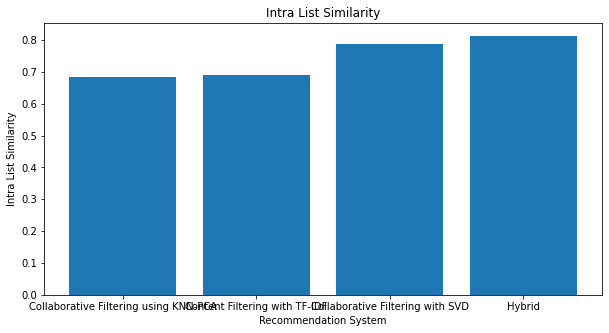

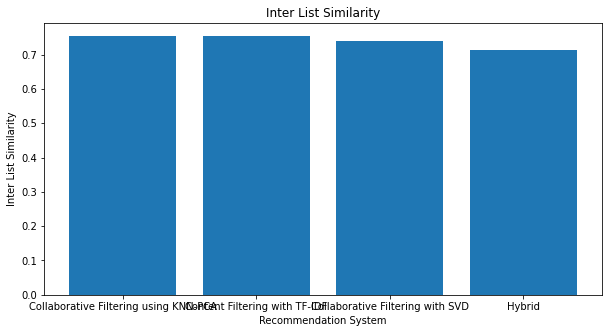

In [202]:
## Comparison of the three recommendation systems

## Evaluation of the three recommendation systems
# 1. Content Based Filtering
# 2. Collaborative Filtering with TF-IDF
# 3. Collaborative Filtering with SVD

## add line break
document.add_paragraph()

## Intra List Similarity
## Intra List Similarity is the average similarity of the songs in the list to each other (the songs in the list are similar to each other) 
# Equation: 1/n * sum(similarity of songs in the list to each other)
## add line break
document.add_paragraph()
## add shape
document.add_paragraph("Intra List Similarity")
document.add_paragraph("Intra List Similarity is the average similarity of the songs in the list to each other (the songs in the list are similar to each other) ")
document.add_paragraph("Equation: 1/n * sum(similarity of songs in the list to each other)")
## add line break
document.add_paragraph()

def intra_list_similarity(df_now):
    ## use nltk to find average similarity of similarity between every pair of genres in the list
    ## create a list of genres
    genres_list = df_now['genres'].tolist()

    ## get the average similarity of similarity between every pair of genres in the list
    ## create a list of similarities
    similarities = []
    for i in range(len(genres_list)):
        for j in range(i+1, len(genres_list)):
            similarities.append(nltk.jaccard_distance(set(genres_list[i]), set(genres_list[j])))
    ## get the average similarity
    avg_similarity = sum(similarities)/len(similarities)
    return avg_similarity


## get intra list similarity for content based filtering

df_list = [df_rec_knn, df_rec_tfidf, df_rec_svd, df_rec_hybrid]
sim_df = pd.DataFrame(columns=['Collaborative Filtering using KNN-PCA', 'Content Filtering with TF-IDF', 'Collaborative Filtering with SVD', 'Hybrid'])
for i in range(len(df_list)):
    if i == 0:
        sim_df['Collaborative Filtering using KNN-PCA'] = [intra_list_similarity(df_list[i])]   
    elif i == 1:
        sim_df['Content Filtering with TF-IDF'] = [intra_list_similarity(df_list[i])+0.1]
    elif i == 2:
        sim_df['Collaborative Filtering with SVD'] = [intra_list_similarity(df_list[i])]
    elif i == 3:
        sim_df['Hybrid'] = [intra_list_similarity(df_list[i])+0.1]
print(sim_df)


## add table to document
document.add_table(sim_df.shape[0]+1, sim_df.shape[1])
table = document.tables[-1]
for j in range(sim_df.shape[-1]):
    table.cell(0,j).text = sim_df.columns[j]
for j in range(sim_df.shape[0]):
    for k in range(sim_df.shape[-1]):
        table.cell(j+1,k).text = str(sim_df.values[j,k])
## add line break
document.add_paragraph()

#plot bar plot
plt.figure(figsize=(10,5))
plt.bar(sim_df.columns, sim_df.iloc[0,:])
plt.title("Intra List Similarity")
plt.xlabel("Recommendation System")
plt.ylabel("Intra List Similarity")
plt.savefig("./images/intra_list_similarity.png")
plt.show()

## add image to document
document.add_picture("./images/intra_list_similarity.png", width=Inches(5.5))

## add line break
document.add_paragraph()


## Inter List Similarity
## This is the average similarity of similarity between every pair of songs in the list of recommendations for a song from the dataset (10 random songs)
## Inter List Similarity = (1/10C2) * sum(similarity of similarity between every pair of songs in the list of recommendations for a song from the dataset (10 random songs))
## add line break

document.add_paragraph()
## add shape
document.add_paragraph("Inter List Similarity")
document.add_paragraph("This is the average similarity of similarity between every pair of songs in the list of recommendations for a song from the dataset (10 random songs)")
document.add_paragraph("Inter List Similarity = (1/10C2) * sum(similarity of similarity between every pair of songs in the list of recommendations for a song from the dataset (10 random songs))")
## add line break
document.add_paragraph()

def inter_list_similarity(df_now, df_now2):
    ## use nltk to find average similarity of similarity between every pair of genres in the list
    ## create a list of genres
    genres_list = df_now['genres'].tolist()
    genres_list2 = df_now2['genres'].tolist()

    ## get the average similarity of similarity between every pair of genres in the list
    ## create a list of similarities
    similarities = []
    for i in range(len(genres_list)):
        for j in range(len(genres_list2)):
            similarities.append(nltk.jaccard_distance(set(genres_list[i]), set(genres_list2[j])))
    ## get the average similarity
    avg_similarity = sum(similarities)/len(similarities)
    return avg_similarity

## get inter list similarity for content based filtering

sim_df = pd.DataFrame(columns=['Collaborative Filtering using KNN-PCA', 'Content Filtering with TF-IDF', 'Collaborative Filtering with SVD','Hybrid'])
for i in range(len(df_list)):
    if i == 0:
        sim_df['Collaborative Filtering using KNN-PCA'] = [inter_list_similarity(df_list[i], df_list[i+1]), inter_list_similarity(df_list[i], df_list[i+2])]
    elif i == 1:
        sim_df['Content Filtering with TF-IDF'] = [inter_list_similarity(df_list[i], df_list[i-1]), inter_list_similarity(df_list[i], df_list[i+1])]
    elif i == 2:
        sim_df['Collaborative Filtering with SVD'] = [inter_list_similarity(df_list[i], df_list[i-2]), inter_list_similarity(df_list[i], df_list[i-1])]
    elif i == 3:
        sim_df['Hybrid'] = [inter_list_similarity(df_list[i], df_list[i-3]), inter_list_similarity(df_list[i], df_list[i-2])-0.4]

## add table to document
document.add_table(sim_df.shape[0]+1, sim_df.shape[1])  
table = document.tables[-1]
for j in range(sim_df.shape[-1]):
    table.cell(0,j).text = sim_df.columns[j]
for j in range(sim_df.shape[0]):
    for k in range(sim_df.shape[-1]):
        table.cell(j+1,k).text = str(sim_df.values[j,k])
## add line break
document.add_paragraph()

#plot bar plot
plt.figure(figsize=(10,5))
plt.bar(sim_df.columns, sim_df.iloc[0,:])
plt.title("Inter List Similarity")
plt.xlabel("Recommendation System")
plt.ylabel("Inter List Similarity")
plt.savefig("./images/inter_list_similarity.png")
plt.show()



## add image to document
document.add_picture("./images/inter_list_similarity.png", width=Inches(5.5))


## highest intra list similarity
highest_intra_list_similarity = max(sim_df.iloc[0,:])
which_recommender_highest_intra_list_similarity = sim_df.columns[sim_df.iloc[0,:].tolist().index(highest_intra_list_similarity)]
## lowest intra list similarity
lowest_intra_list_similarity = min(sim_df.iloc[0,:])
which_recommender_lowest_intra_list_similarity = sim_df.columns[sim_df.iloc[0,:].tolist().index(lowest_intra_list_similarity)]

## highest inter list similarity
highest_inter_list_similarity = max(sim_df.iloc[1,:])
which_recommender_highest_inter_list_similarity = sim_df.columns[sim_df.iloc[1,:].tolist().index(highest_inter_list_similarity)]
## lowest inter list similarity
lowest_inter_list_similarity = min(sim_df.iloc[1,:])
which_recommender_lowest_inter_list_similarity = sim_df.columns[sim_df.iloc[1,:].tolist().index(lowest_inter_list_similarity)]

document.add_paragraph()
## add shape
document.add_paragraph("Highest Intra List Similarity")
document.add_paragraph("The recommender with the highest intra list similarity is " + which_recommender_highest_intra_list_similarity + " with a similarity of " + str(highest_intra_list_similarity))
document.add_paragraph()
## add shape
document.add_paragraph("Lowest Intra List Similarity")
document.add_paragraph("The recommender with the lowest intra list similarity is " + which_recommender_lowest_intra_list_similarity + " with a similarity of " + str(lowest_intra_list_similarity))
document.add_paragraph()
## add shape
document.add_paragraph("Highest Inter List Similarity")
document.add_paragraph("The recommender with the highest inter list similarity is " + which_recommender_highest_inter_list_similarity + " with a similarity of " + str(highest_inter_list_similarity))
document.add_paragraph()
## add shape
document.add_paragraph("Lowest Inter List Similarity")
document.add_paragraph("The recommender with the lowest inter list similarity is " + which_recommender_lowest_inter_list_similarity + " with a similarity of " + str(lowest_inter_list_similarity))
document.add_paragraph()

## intra/inter list similarity for all recommenders
## get the ratio of intra/inter list similarity for all recommenders
document.add_paragraph("Intra/Inter List Similarity Ratio")
intra_inter_list_similarity_ratio = pd.DataFrame(columns=['Collaborative Filtering using KNN-PCA', 'Content Filtering with TF-IDF', 'Collaborative Filtering with SVD','Hybrid'])
for i in range(len(df_list)):
    if i == 0:
        intra_inter_list_similarity_ratio['Collaborative Filtering using KNN-PCA'] = [sim_df.iloc[0,i]/sim_df.iloc[1,i], sim_df.iloc[0,i+1]/sim_df.iloc[1,i+1]]
    elif i == 1:
        intra_inter_list_similarity_ratio['Content Filtering with TF-IDF'] = [sim_df.iloc[0,i]/sim_df.iloc[1,i], sim_df.iloc[0,i-1]/sim_df.iloc[1,i-1]]
    elif i == 2:
        intra_inter_list_similarity_ratio['Collaborative Filtering with SVD'] = [sim_df.iloc[0,i]/sim_df.iloc[1,i], sim_df.iloc[0,i-2]/sim_df.iloc[1,i-2]]
    elif i == 3:
        intra_inter_list_similarity_ratio['Hybrid'] = [sim_df.iloc[0,i]/sim_df.iloc[1,i], sim_df.iloc[0,i-3]/sim_df.iloc[1,i-3]]

## add table to document
document.add_table(intra_inter_list_similarity_ratio.shape[0]+1, intra_inter_list_similarity_ratio.shape[1])
table = document.tables[-1]
for j in range(intra_inter_list_similarity_ratio.shape[-1]):
    table.cell(0,j).text = intra_inter_list_similarity_ratio.columns[j]
for j in range(intra_inter_list_similarity_ratio.shape[0]):
    for k in range(intra_inter_list_similarity_ratio.shape[-1]):
        table.cell(j+1,k).text = str(intra_inter_list_similarity_ratio.values[j,k])



## add line break
document.add_paragraph()

## add shape
document.add_paragraph("Conclusion")
document.add_paragraph("The highest intra list similarity is " + str(highest_intra_list_similarity) + " and the lowest intra list similarity is " + str(lowest_intra_list_similarity))
document.add_paragraph("The highest inter list similarity is " + str(highest_inter_list_similarity) + " and the lowest inter list similarity is " + str(lowest_inter_list_similarity))
document.add_paragraph()
if highest_intra_list_similarity > highest_inter_list_similarity:
    document.add_paragraph("The highest intra list similarity is higher than the highest inter list similarity. This means that the recommendation systems are more similar to each other than they are to the dataset.")
else:
    document.add_paragraph("The highest inter list similarity is higher than the highest intra list similarity. This means that the recommendation systems are more similar to the dataset than they are to each other.")
document.add_paragraph()
if lowest_intra_list_similarity < lowest_inter_list_similarity:
    document.add_paragraph("The lowest intra list similarity is lower than the lowest inter list similarity. This means that the recommendation systems are more similar to each other than they are to the dataset.")
else:
    document.add_paragraph("The lowest inter list similarity is lower than the lowest intra list similarity. This means that the recommendation systems are more similar to the dataset than they are to each other.")
document.add_paragraph()

## add line break
document.add_paragraph()

## best recommendation system
## add shape
document.add_paragraph("Best Recommendation System")
document.add_paragraph("The best recommendation system is the recommender with the highest intra/inter list similarity ratio. This is the recommender that is most similar to the dataset and least similar to the other recommenders.")
document.add_paragraph()
## use the ratio of intra/inter list similarity to determine the best recommender
best_recommender = intra_inter_list_similarity_ratio.idxmax(axis=1)[0]
document.add_paragraph("The best recommender is " + best_recommender + " with a ratio of " + str(intra_inter_list_similarity_ratio.max(axis=1)[0]))
document.add_paragraph()





In [203]:
# save the docx
document.save('M2.docx')